In [2]:
import numpy as np
from matplotlib import pyplot as plt
from main import interpolate, solve_gauss, approach
import scipy.integrate as integrate

Load data

In [3]:
with open('function.txt', 'r') as f:
    points = np.array([[float(x) for x in s.split()] for s in f.readlines()])
    x_net = points[:, 0]
    f_net = points[:, 1]
    print(x_net, f_net)
N = 4

[0.   0.15 0.3  0.45 0.6  0.75 0.9  1.05 1.2  1.35 1.5  1.65 1.8  1.95
 2.1 ] [0.000000e+00 2.301000e-03 2.693200e-02 7.090200e-02 3.048200e-02
 2.411270e-01 7.126190e-01 9.943240e-01 4.828300e-01 1.107277e+00
 3.165750e+00 4.144453e+00 2.403475e+00 2.369195e+00 4.352169e+00]


Building interpolating and approximating functions

In [4]:
interpol = interpolate(x_net, f_net)
appr = approach(x_net, f_net, N)

Summary graph

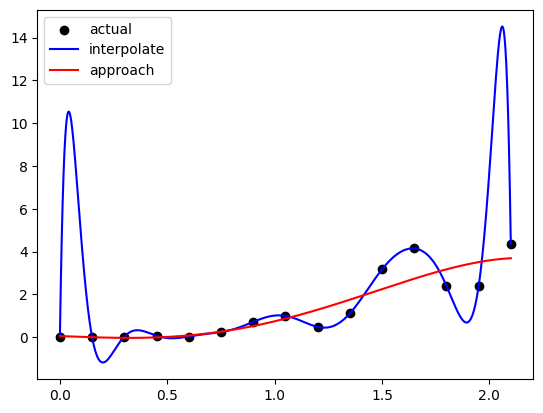

In [5]:
plt.scatter(x_net, f_net, c='k')
arg_sp = np.linspace(min(x_net), max(x_net), 1_000)
plt.plot(arg_sp, np.array([interpol(x) for x in arg_sp]), c='b')
plt.plot(arg_sp, np.array([appr(x) for x in arg_sp]), c='r')
plt.legend(["actual", "interpolate", "approach"])
plt.show()

In [6]:
sigma = 0.25
delta = np.random.normal(0, sigma, x_net.shape)
delta

array([ 0.25062775, -0.10787839,  0.28331722, -0.2011753 , -0.10890138,
       -0.48069354, -0.01984648, -0.51762584,  0.09731305, -0.16349351,
        0.38951599,  0.29715206, -0.0679143 , -0.10564953,  0.17267633])

In [7]:
x_net_delta = x_net
f_net_delta = f_net + delta
interpol_delta = interpolate(x_net_delta, f_net_delta)
appr_delta = approach(x_net_delta, f_net_delta, N)

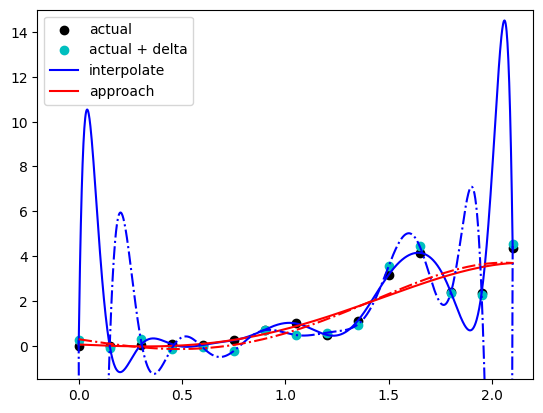

In [8]:
plt.scatter(x_net, f_net, c='k')
plt.scatter(x_net_delta, f_net_delta, c='c')
arg_sp = np.linspace(min(x_net), max(x_net), 1_000)
plt.plot(arg_sp, np.array([interpol(x) for x in arg_sp]), c='b')
plt.plot(arg_sp, np.array([appr(x) for x in arg_sp]), c='r')
plt.plot(arg_sp, np.array([interpol_delta(x) for x in arg_sp]), c='b', linestyle='dashdot')
plt.plot(arg_sp, np.array([appr_delta(x) for x in arg_sp]), c='r',  linestyle='dashdot')
plt.legend(["actual", "actual + delta", "interpolate", "approach"])
plt.xlim((-0.2, 2.2))
plt.ylim((-1.5, 15))
plt.show()

In [9]:
np.sqrt(integrate.quad(lambda x: (appr(x) - appr_delta(x)) ** 2, min(x_net), max(x_net))[0])

0.20806679365998676

In [10]:
np.sqrt(integrate.quad(lambda x: (interpol(x) - interpol_delta(x)) ** 2, min(x_net), max(x_net))[0])

21.119745561501613

In [33]:
def calc_dev(sigma: float):
    delta = np.random.normal(0, sigma, x_net.shape)
    # x_net_delta = x_net + delta
    # f_net_delta = f_net
    x_net_delta = x_net
    f_net_delta = f_net + delta
    interpol_df = interpolate(x_net_delta, f_net_delta)
    appr_df = approach(x_net_delta, f_net_delta, N)

    interpol_delta = np.sqrt(
                        integrate.quad(
                        lambda x: (interpol(x) - interpol_df(x)) ** 2, min(x_net), max(x_net))[0])
    appr_delta = np.sqrt(
                    integrate.quad(
                    lambda x: (appr(x) - appr_df(x)) ** 2, min(x_net), max(x_net))[0])

    return interpol_delta, appr_delta

In [34]:
def calc_dev_mean(sigma: float, sample_size:int = 100):
    delta_sample = np.array([list(calc_dev(sigma)) for _ in range(sample_size)])
    return np.mean(delta_sample[:, 0]), np.mean(delta_sample[:, 1])

In [35]:
sample_size = 100
dev_mean = np.array([list(calc_dev_mean(sigma, sample_size))
                     for sigma in np.logspace(-6, -2, num=9, endpoint=True, base=10)])

dev_std = np.array([list(calc_dev_mean(sigma, sample_size))
                     for sigma in np.logspace(-6, -2, num=9, endpoint=True, base=10)])

for i, sigma in enumerate(np.logspace(-6, -2, num=9, endpoint=True, base=10)):
    print(f"{sigma=}")
    print(f"\tInterpolate delta mean = {dev_mean[i, 0]:.5f}")
    print(f"\tApproach delta mean = {dev_mean[i, 1]:.5f}")
    # delta_sample

sigma=1e-06
	Interpolate delta mean = 0.00003
	Approach delta mean = 0.00000
sigma=3.162277660168379e-06
	Interpolate delta mean = 0.00009
	Approach delta mean = 0.00000
sigma=1e-05
	Interpolate delta mean = 0.00032
	Approach delta mean = 0.00001
sigma=3.1622776601683795e-05
	Interpolate delta mean = 0.00098
	Approach delta mean = 0.00002
sigma=0.0001
	Interpolate delta mean = 0.00346
	Approach delta mean = 0.00008
sigma=0.00031622776601683794
	Interpolate delta mean = 0.01082
	Approach delta mean = 0.00023
sigma=0.001
	Interpolate delta mean = 0.03086
	Approach delta mean = 0.00075
sigma=0.0031622776601683794
	Interpolate delta mean = 0.10154
	Approach delta mean = 0.00220
sigma=0.01
	Interpolate delta mean = 0.29652
	Approach delta mean = 0.00735


Text(0, 0.5, 'delta mean')

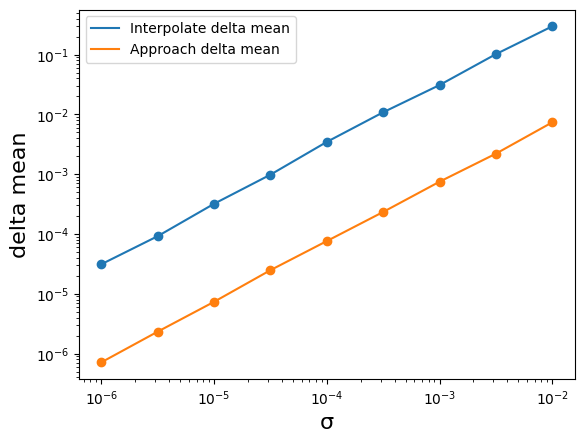

In [37]:
sigma_space = np.logspace(-6, -2, num=9, endpoint=True, base=10)
plt.plot(sigma_space, dev_mean[:, 0])
plt.plot(sigma_space, dev_mean[:, 1])
plt.scatter(sigma_space, dev_mean[:, 0])
plt.scatter(sigma_space, dev_mean[:, 1])
plt.xscale('log')
plt.yscale('log')
plt.legend(["Interpolate delta mean", "Approach delta mean"])
plt.xlabel(u'\u03c3', fontsize=16)
plt.ylabel("delta mean", fontsize=16)

In [26]:
print(u'\u03c3')

σ
